In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import tifffile as tf
import math
import matplotlib as mpl

In [2]:
file_folder_list_ach_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly3',
                        '20230428-nsyb-G7f-rAch1h/fly1',
                        '20230507-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly3',
                        '20230515-nsyb-G7f-rAch1h/fly1']
file_folder_list_ach_2 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
file_folder_list_5ht_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']
file_folder_list_5ht_2 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
                '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
                '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

In [3]:
# choose the variable, channel, odor
# the flag_name changes with filename
filename = 'acc' # acc / auc_weighted / precision_weighted / recall_weighted / f1_weighted
channel_selected = [1,2] # 1-G7f, 2-NM, 0-Both
odor_selected = 0
flag_name = 'Accuracy' 

# only left part
br_index = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
br_name = ['MBPED_L','MBVL_L','MBML_L','LH_L','SLP_L','SIP_L','SMP_L','CRE_L','SCL_L','ICL_L',
'NO','EB','FB','LAL_L','AOTU_L','AVLP_L','PVLP_L','IVLP_L','VES_L','GOR_L','SPS_L','EPA_L','FLA_L']
br_olf = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(len(br_index))
print(len(br_name))
print(len(br_olf))

# parameters
atlas_z_range = range(13,38)
win_x = 4
win_y = 4
win_z = 2
if_save = False
num_channel_choice = 3
num_odor_choice = 1

23
23
23


In [4]:
# load Ach data
result_path = '../results/Ach-ver16'
sub_path = 'Accuracy_map_DEEPCAD_formal'
atlas_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-rAch1h'
atlas_file_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
list_fly = [0,1,2,3,4,5,6,7,8,9]###### choose fly
LH_none = [4]
num_fly = len(list_fly)

figure_save_path = result_path + '/' + 'figures-for-ver16-final6'
folder = os.path.exists(figure_save_path)
if not folder:
    os.makedirs(figure_save_path)

# compute 
list_acc_ach = np.zeros((num_fly,len(br_index),num_channel_choice,num_odor_choice))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_ach_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    # print(np.shape(a))

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_ach_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    atlas = atlas[range(int(win_x/2),np.size(atlas,0),win_x),:,:]
    atlas = atlas[:,range(int(win_y/2),np.size(atlas,1),win_y),:]
    atlas = atlas[:,:,range(0,np.size(atlas,2),win_z)]
    # print('load atlas done! size:')
    # print(np.shape(atlas))

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = a[:,:,mask]
            if flag.ndim==3:
                data = np.mean(flag,2)
            elif flag.ndim==2:
                data = flag 
            if num_odor_choice == 1:
                list_acc_ach[i,j,:,0] = np.squeeze(data)
            else:
                list_acc_ach[i,j,:,:] = data

list_acc_ach_selected = np.squeeze(list_acc_ach[:,:,channel_selected,odor_selected])
list_acc_ach_selected = list_acc_ach_selected*100

In [5]:
# load 5HT data
result_path = '../results/5HT-ver16'
sub_path = 'Accuracy_map_DEEPCAD_formal'
atlas_path = result_path
atlas_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-r5HT1.0'
list_fly = [0,1,2,3,4,5,6,7,8,9]###### choose fly
LH_none = [7]
num_fly = len(list_fly)

# compute 
list_acc_5ht = np.zeros((num_fly,len(br_index),num_channel_choice,num_odor_choice))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_5ht_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    # print(np.shape(a))

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_5ht_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    atlas = atlas[range(int(win_x/2),np.size(atlas,0),win_x),:,:]
    atlas = atlas[:,range(int(win_y/2),np.size(atlas,1),win_y),:]
    atlas = atlas[:,:,range(0,np.size(atlas,2),win_z)]
    # print('load atlas done! size:')
    # print(np.shape(atlas))

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = a[:,:,mask]
            if flag.ndim==3:
                data = np.mean(flag,2)
            elif flag.ndim==2:
                data = flag 
            if num_odor_choice == 1:
                list_acc_5ht[i,j,:,0] = np.squeeze(data)
            else:
                list_acc_5ht[i,j,:,:] = data

list_acc_5ht_selected = np.squeeze(list_acc_5ht[:,:,channel_selected,odor_selected])
list_acc_5ht_selected = list_acc_5ht_selected*100

In [6]:
print(np.shape(list_acc_ach_selected))
print(np.shape(list_acc_5ht_selected))

(10, 23, 2)
(10, 23, 2)


In [7]:
# integrate the data
list_acc_g7f = np.concatenate((np.squeeze(list_acc_ach_selected[:,:,0]),np.squeeze(list_acc_5ht_selected[:,:,0])),axis = 0)
list_acc_ach = np.squeeze(list_acc_ach_selected[:,:,1])
list_acc_5ht = np.squeeze(list_acc_5ht_selected[:,:,1])
print(np.shape(list_acc_g7f))
print(np.shape(list_acc_ach))
print(np.shape(list_acc_5ht))

(20, 23)
(10, 23)
(10, 23)


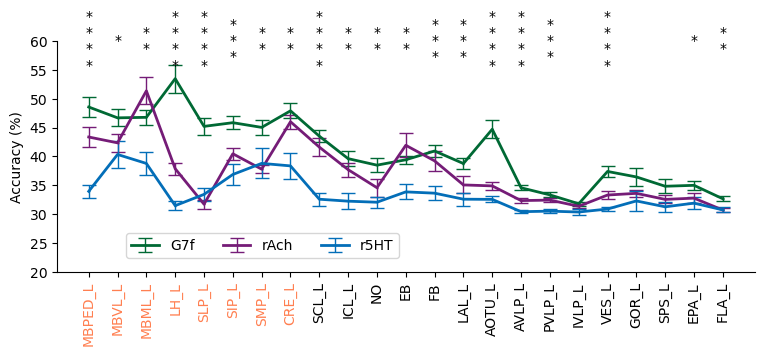

In [8]:
plt.figure(figsize = (9,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
color_list = ['#006934','#751C77','#036EB8']
labels = ['G7f','rAch','r5HT']

# plot g7f
the_mean_g7f = np.zeros(len(br_index))
the_std_g7f = np.zeros(len(br_index))
for i in range(len(br_index)):
    a = list_acc_g7f[:,i]
    a = a[a!=0]
    the_mean_g7f[i] = np.mean(a,0)
    the_std_g7f[i] = np.std(a,ddof = 1)/math.sqrt(len(a))
plt.errorbar(range(len(br_index)),the_mean_g7f,yerr=the_std_g7f,ecolor=color_list[0],elinewidth=1,marker='.',mfc=color_list[0],\
mec=color_list[0],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=color_list[0], linewidth=2,label = labels[0])

# plot ach
the_mean_ach = np.zeros(len(br_index))
the_std_ach = np.zeros(len(br_index))
for i in range(len(br_index)):
    a = list_acc_ach[:,i]
    a = a[a!=0]
    the_mean_ach[i] = np.mean(a,0)
    the_std_ach[i] = np.std(a,ddof = 1)/math.sqrt(len(a))
plt.errorbar(range(len(br_index)),the_mean_ach,yerr=the_std_ach,ecolor=color_list[1],elinewidth=1,marker='.',mfc=color_list[1],\
mec=color_list[1],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=color_list[1], linewidth=2,label = labels[1])

# plot 5ht
the_mean_5ht = np.zeros(len(br_index))
the_std_5ht = np.zeros(len(br_index))
for i in range(len(br_index)):
    a = list_acc_5ht[:,i]
    a = a[a!=0]
    the_mean_5ht[i] = np.mean(a,0)
    the_std_5ht[i] = np.std(a,ddof = 1)/math.sqrt(len(a))
plt.errorbar(range(len(br_index)),the_mean_5ht,yerr=the_std_5ht,ecolor=color_list[2],elinewidth=1,marker='.',mfc=color_list[0],\
mec=color_list[2],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=color_list[2], linewidth=2,label = labels[2])
plt.ylim((20,60))
plt.ylabel((flag_name + ' (%)'))
plt.xticks(range(len(br_index)),br_name,rotation=90)
plt.legend(bbox_to_anchor=(0.5, 0.03),loc=4,ncol=3)
for j in range(len(br_index)):
    if br_olf[j]==1:
        plt.gca().get_xticklabels()[j].set_color('coral') 

# *
for i in range(len(br_index)):
    a = list_acc_g7f[:,i]
    a = a[a!=0]
    b = list_acc_ach[:,i]
    b = b[b!=0]
    c = list_acc_5ht[:,i]
    c = c[c!=0]
    y = 60
    res = kruskal(a,b,c)
    p = res.pvalue
    if p<0.05 and p>=0.01:
        plt.text(i,y,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(i,y,'*\n*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(i,y,'*\n*\n*',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(i,y,'*\n*\n*\n*',verticalalignment = 'center', horizontalalignment = 'center') 

if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + '4C_accuracy_map_region_' + filename + '_C'+str(channel_selected)+'_odor'+str(odor_selected)+'-bar-hor.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + '4C_accuracy_map_region_' + filename + '_C'+str(channel_selected)+'_odor'+str(odor_selected)+'-bar-hor.png',dpi = 300,bbox_inches = 'tight')
    # plt.rcParams['svg.fonttype'] = 'none'
    # plt.savefig(figure_save_path + '/' + '3B_accuracy_map_region_' + filename + '_C'+str(channel_selected)+'_odor'+str(odor_selected)+'-bar.svg',dpi = 300,bbox_inches = 'tight')
plt.show()